In [44]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
import sklearn
import umap
import seaborn
import matplotlib.pyplot as plt
import numpy
import pandas





Revisar el archivo utilizando las funciones info(), describe() y groupby()

In [46]:
df = pd.read_csv('anexo03.csv', encoding='latin1')

In [47]:
type(df)

pandas.core.frame.DataFrame

In [48]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Nick        140 non-null    object 
 1   intrepido   140 non-null    float64
 2   organizado  140 non-null    float64
 3   sociable    140 non-null    float64
 4   empático    140 non-null    float64
 5   enojon      140 non-null    float64
 6   tweets      140 non-null    float64
 7   categoria   140 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 8.9+ KB
None


In [49]:
print(df.describe())

        intrepido  organizado    sociable    empático      enojon      tweets  \
count  140.000000  140.000000  140.000000  140.000000  140.000000  140.000000   
mean    44.414591   22.977135   40.764428   22.918528    8.000098   98.715484   
std      8.425723    5.816851    7.185246    7.657122    3.039248   44.714071   
min     30.020465    7.852756   18.693542    9.305985    1.030213    5.020800   
25%     38.206484   19.740299   36.095722   17.050993    6.086144   66.218475   
50%     44.507091   22.466718   41.457492   21.384554    7.839722   94.711400   
75%     49.365923   26.091606   45.197769   28.678866    9.758189  119.707925   
max     71.696129   49.637863   59.824844   40.583162   23.978462  217.183200   

        categoria  
count  140.000000  
mean     4.050000  
std      2.658839  
min      1.000000  
25%      2.000000  
50%      3.500000  
75%      7.000000  
max      9.000000  


In [50]:
print(df.columns)

Index(['Nick', 'intrepido', 'organizado', 'sociable', 'empático', 'enojon',
       'tweets', 'categoria'],
      dtype='object')


In [51]:
df['media'] = df[['intrepido', 'organizado']].mean(axis=1)
df['std'] = df[['intrepido', 'organizado']].std(axis=1)

In [52]:

groupby_result = df.groupby(['intrepido', 'organizado']).agg({'media': 'mean', 'std': 'std'})
print(groupby_result)

                          media  std
intrepido organizado                
30.020465 14.699612   22.360039  NaN
30.691797 12.708594   21.700195  NaN
30.825938 16.398359   23.612148  NaN
31.215455 17.506364   24.360909  NaN
31.450855 19.430342   25.440599  NaN
...                         ...  ...
60.225087 22.309478   41.267283  NaN
63.995606 27.178333   45.586970  NaN
65.067447 24.692128   44.879787  NaN
66.665564 20.382331   43.523948  NaN
71.696129 12.489274   42.092701  NaN

[140 rows x 2 columns]


In [54]:
# Agrupar por alguna columna y calcular promedio
print(df.groupby('Nick').mean())

                intrepido  organizado   sociable   empático    enojon  \
Nick                                                                    
Actor1          41.328182   20.241212  39.173333  21.070505  7.823535   
Actor10         49.470000   23.442595  30.966260  23.053053  9.577863   
Actor11         57.427596   25.008750  33.121827  12.412404  7.410577   
Actor12         66.665564   20.382331  26.855564  15.602331  4.110075   
Actor13         48.587099   49.637863  26.988702   9.948168  2.979542   
...                   ...         ...        ...        ...       ...   
entrevistador5  45.369773   23.932197  35.925909  23.478258  8.448409   
entrevistador6  44.501603   17.857099  46.598931  29.535038  2.913206   
entrevistador7  30.691797   12.708594  59.824844  33.395938  3.477188   
entrevistador8  38.788280   29.765914  36.947204  24.048172  9.351505   
entrevistador9  45.813043   15.982935  53.545870  30.403261  5.573043   

                  tweets  categoria      media    

Generar clústers con las columnas "intrépido", "organizado" y "sociable"

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Seleccionar las columnas relevantes
X = df[['intrepido', 'organizado', 'sociable']]

# Crear modelo K-means con 3 clústers
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajustar el modelo
kmeans.fit(X)

# Predicciones
labels = kmeans.labels_

# Agregar etiquetas al dataframe original
df['clúster'] = labels

# Visualizar los centroides
centroides = kmeans.cluster_centers_
print("Centroides:", centroides)


Centroides: [[57.14055352 26.45397167 32.07523576]
 [45.71243645 24.45079942 39.30103055]
 [36.34157342 18.93125296 47.22586   ]]


 Identificar los registros más cercanos a los centroides

In [ ]:
# Calcular distancias a los centroides
distancias = np.linalg.norm(X.values[:, np.newaxis] - centroides, axis=2)

# Encontrar el índice del punto más cercano a cada centroide
indices_cercanos = np.argmin(distancias, axis=0)

# Mostrar los puntos más cercanos a cada centroide
for i, indice in enumerate(indices_cercanos):
    print(f"Punto más cercano al centroide {i}:")
    print(df.iloc[indice])


Punto más cercano al centroide 0:
Nick            Actor11
intrepido     57.427596
organizado     25.00875
sociable      33.121827
empático      12.412404
enojon         7.410577
tweets         123.8173
categoria             1
media         41.218173
std           22.923586
clúster               0
Name: 10, dtype: object
Punto más cercano al centroide 1:
Nick          Deportista5
intrepido       46.393488
organizado      25.451163
sociable         39.93031
empático        16.658062
enojon           8.452791
tweets           145.1473
categoria               7
media           35.922325
std              14.80846
clúster                 1
Name: 105, dtype: object
Punto más cercano al centroide 2:
Nick          entrevistador2
intrepido          36.664677
organizado         19.642258
sociable           48.530806
empático           31.138871
enojon              7.305968
tweets               47.0645
categoria                  4
media              28.153467
std                12.036668
clúster  

Generar gráficas correspondientes en 2D y 3D

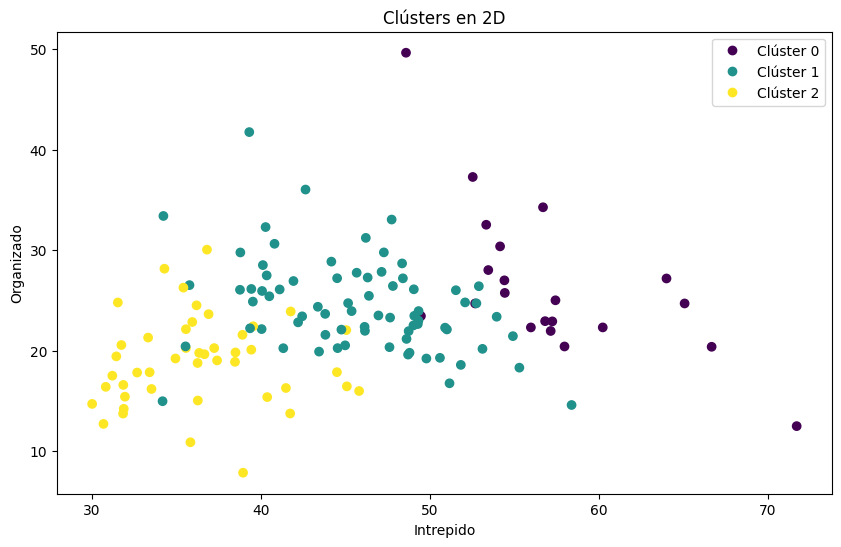

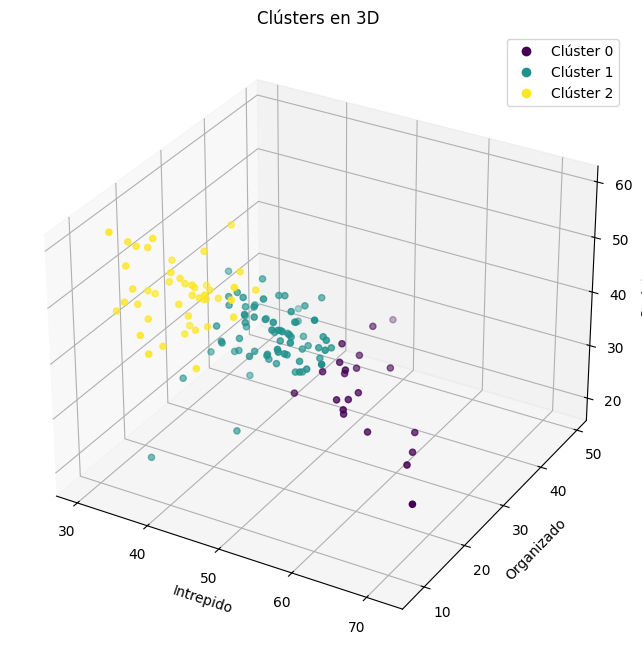

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Gráfico 2D
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['intrepido'], df['organizado'], c=df['clúster'])
plt.title('Clústers en 2D')
plt.xlabel('Intrepido')
plt.ylabel('Organizado')
plt.legend(scatter.legend_elements()[0], ['Clúster 0', 'Clúster 1', 'Clúster 2'])
plt.show()

# Gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['intrepido'], df['organizado'], df['sociable'], c=df['clúster'])
ax.set_title('Clústers en 3D')
ax.set_xlabel('Intrepido')
ax.set_ylabel('Organizado')
ax.set_zlabel('Sociable')
ax.legend(scatter.legend_elements()[0], ['Clúster 0', 'Clúster 1', 'Clúster 2'])
plt.show()


Identificar el número de registros para cada clúster

In [ ]:
print(df['clúster'].value_counts())


clúster
1    74
2    45
0    21
Name: count, dtype: int64


Ingresar un registro nuevo para verificar el funcionamiento del programa

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

nuevo_registro = [[80, 70, 90]]  
prediccion = kmeans.predict(nuevo_registro)
print(f"El nuevo registro pertenece al clúster: {prediccion[0]}")

warnings.resetwarnings()


El nuevo registro pertenece al clúster: 0


In [ ]:
# Mostrar las primeras filas de la columna problemática
print(df['intrepido'].head())

# Verificar valores únicos
print(df['intrepido'].unique())

0    41.328182
1    54.407727
2    36.272348
3    53.110480
4    41.765960
Name: intrepido, dtype: float64
[41.328182 54.407727 36.272348 53.11048  41.76596  46.955854 40.046439
 52.535221 31.450855 49.47     57.427596 66.665564 48.587099 46.137348
 47.143474 48.743333 53.331333 51.006406 47.646364 43.81828  46.21
 43.443893 51.161    58.380294 40.345769 51.537405 36.258913 40.377154
 47.610076 49.792403 36.909459 47.27686  49.28542  30.825938 38.948976
 45.088504 56.691163 49.077731 60.225087 56.815859 55.974031 52.082462
 52.675729 57.241308 41.929385 49.331231 49.322373 48.355859 48.403333
 49.049323 47.737462 54.911368 65.067447 35.834375 63.995606 38.499688
 55.293566 54.151721 53.95     43.805615 71.696129 52.750992 48.617348
 50.594462 34.186667 49.028308 53.453713 47.811742 46.158281 57.962308
 41.733854 36.664677 40.073543 30.020465 45.369773 44.501603 30.691797
 38.78828  45.813043 51.830571 35.566589 33.422105 57.145227 37.240989
 32.683125 54.431756 44.541328 48.796045 31.9

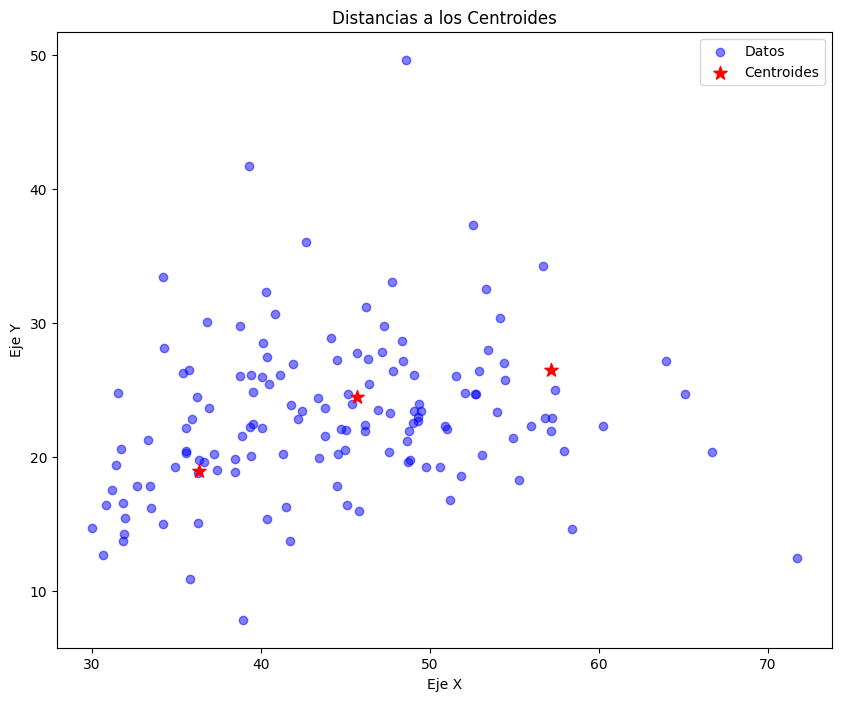

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='blue', alpha=0.5, label='Datos')
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100, marker='*', label='Centroides')
plt.title('Distancias a los Centroides')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()

C:\Users\upuan\AppData\Local\Temp\ipykernel_17484\3973020491.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([punto[0], centroide[0]], [punto[1], centroide[1]], color='green', linestyle='--', linewidth=0.5, alpha=0.7)


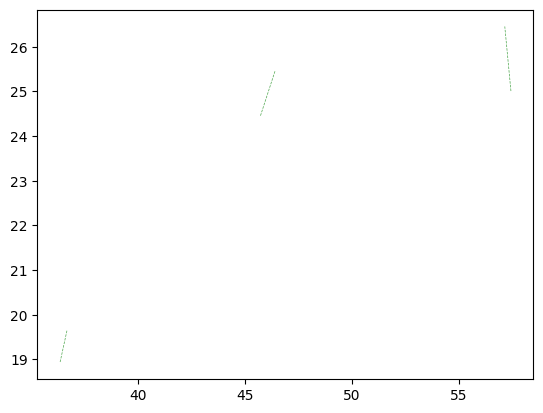

In [ ]:
for i, indice in enumerate(indices_cercanos):
    punto = X.iloc[indice]
    centroide = centroides[i]
    plt.plot([punto[0], centroide[0]], [punto[1], centroide[1]], color='green', linestyle='--', linewidth=0.5, alpha=0.7)


C:\Users\upuan\AppData\Local\Temp\ipykernel_17484\2117375762.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(texto, (punto[0], punto[1]), xytext=(5, 5), textcoords='offset points',


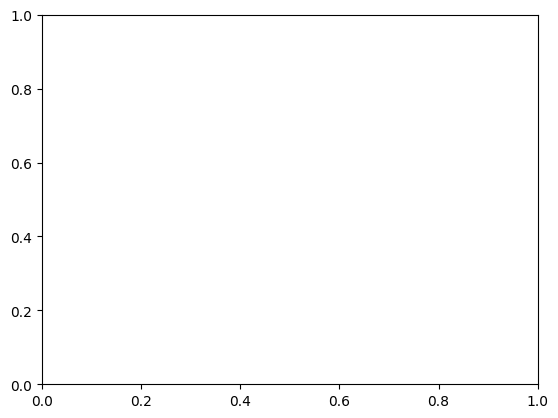

In [ ]:
for i, indice in enumerate(indices_cercanos):
    punto = X.iloc[indice]
    texto = f"P{i}: {df.iloc[indice].values}"
    plt.annotate(texto, (punto[0], punto[1]), xytext=(5, 5), textcoords='offset points',
                 bbox=dict(boxstyle="round", fc="0.8"), arrowprops=dict(arrowstyle="->"))

In [ ]:
print(X.iloc[indices_cercanos])
print(df.iloc[indices_cercanos])


     intrepido  organizado   sociable
10   57.427596   25.008750  33.121827
105  46.393488   25.451163  39.930310
71   36.664677   19.642258  48.530806
               Nick  intrepido  organizado   sociable   empático    enojon  \
10          Actor11  57.427596   25.008750  33.121827  12.412404  7.410577   
105     Deportista5  46.393488   25.451163  39.930310  16.658062  8.452791   
71   entrevistador2  36.664677   19.642258  48.530806  31.138871  7.305968   

       tweets  categoria      media        std  clúster  
10   123.8173          1  41.218173  22.923586        0  
105  145.1473          7  35.922325  14.808460        1  
71    47.0645          4  28.153467  12.036668        2  


In [ ]:
plt.show(block=True)


In [ ]:
plt.show()

C:\Users\upuan\AppData\Local\Temp\ipykernel_17484\3966205370.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([punto[0], centroide[0]], [punto[1], centroide[1]], color='green', linestyle='--', linewidth=0.5, alpha=0.7)
C:\Users\upuan\AppData\Local\Temp\ipykernel_17484\3966205370.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(texto, (punto[0], punto[1]), xytext=(5, 5), textcoords='offset points',


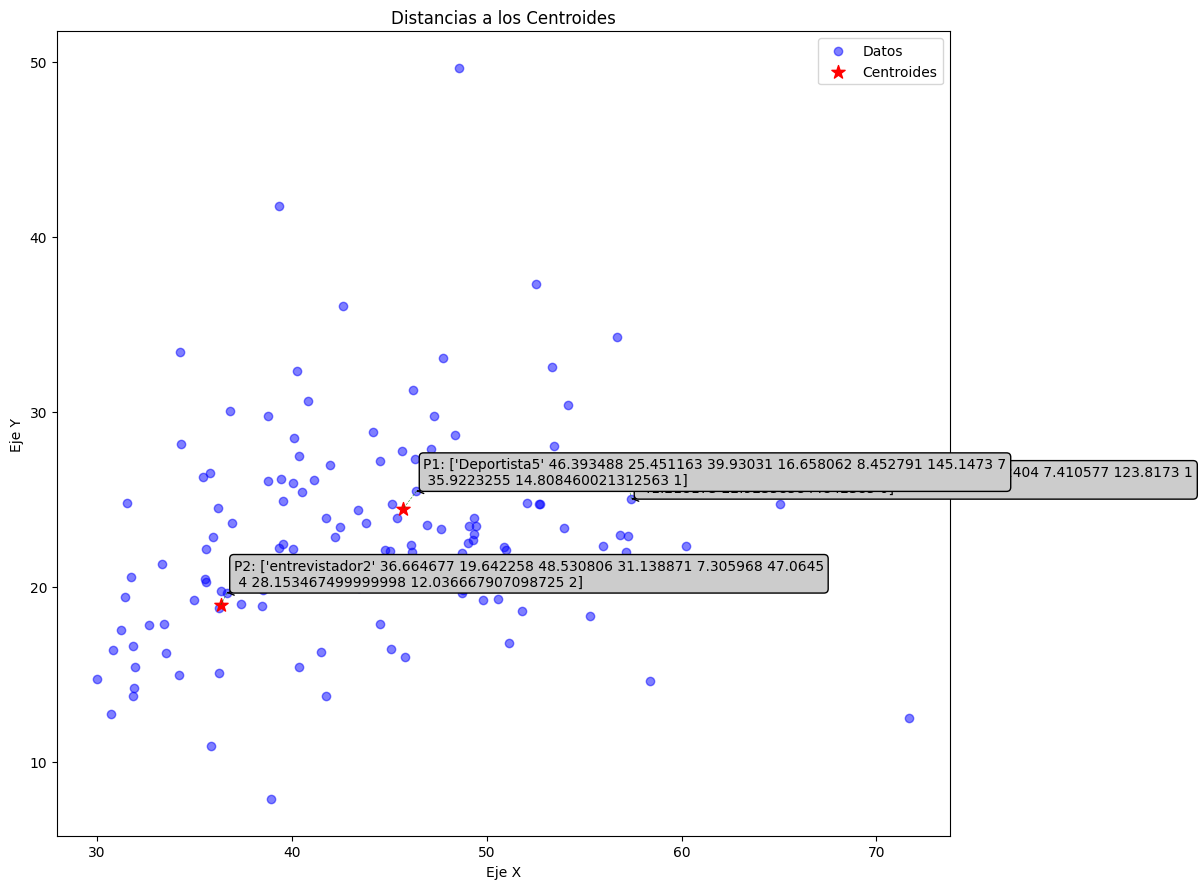

In [ ]:
# Suponiendo que ya tienes X, df y centroides calculados
distancias = np.linalg.norm(X.values[:, np.newaxis] - centroides, axis=2)
indices_cercanos = np.argmin(distancias, axis=0)

plt.figure(figsize=(12, 9))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='blue', alpha=0.5, label='Datos')
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=100, marker='*', label='Centroides')

for i, indice in enumerate(indices_cercanos):
    punto = X.iloc[indice]
    centroide = centroides[i]
    plt.plot([punto[0], centroide[0]], [punto[1], centroide[1]], color='green', linestyle='--', linewidth=0.5, alpha=0.7)

for i, indice in enumerate(indices_cercanos):
    punto = X.iloc[indice]
    texto = f"P{i}: {df.iloc[indice].values}"
    plt.annotate(texto, (punto[0], punto[1]), xytext=(5, 5), textcoords='offset points',
                 bbox=dict(boxstyle="round", fc="0.8"), arrowprops=dict(arrowstyle="->"))

plt.title('Distancias a los Centroides')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.tight_layout()
plt.show()

Este gráfico que muestra:

Todos los puntos del conjunto de datos en azul.
Los centroides en rojo.
Líneas verdes discontinuas que conectan cada punto con su centroide más cercano.
Información sobre los puntos más cercanos a cada centroide mediante anotaciones.